# Gradient Boosting Machines (GBM)

## Basic Modules and Data Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

In [8]:
X, y = make_blobs(n_samples=5000, centers = 2, n_features = 2, cluster_std=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

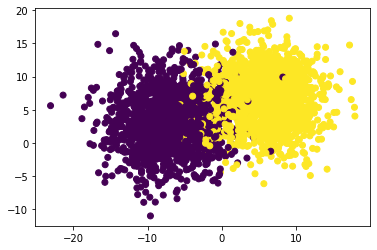

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.show()

## Baseline Model

We want to build a binary classifier, trained using our train dataset and predict the class of a new data point. Since the problem is very simple we can set up a baseline using a simple decision stump:

In [10]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1)   # max_depth = 1 mean this is just a stump.

classifier.fit(X_train, y_train)

print(f'Accuracy of single decision stump: {classifier.score(X_test, y_test)}')

Accuracy of single decision stump 0.9485


## Gradient Boosted Classifier

In [26]:
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators= 4000, learning_rate=0.01, max_depth=3, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict_proba(X_test)[:,1]

print(f'Logloss on the test dataset: {log_loss(y_test,y_pred)}')
print(f'Accuracy of the GBM Classifier: {gb_classifier.score(X_test, y_test)}')


Logloss on the test dataset: 0.12965617221192005
Accuracy of the GBM Classifier: 0.951


## Impact of Individual Trees

In [34]:
cumulative_preds = np.array([x for x in gb_classifier.staged_decision_function(X_test)])
print(cumulative_preds.shape)

cumulative_preds = cumulative_preds[:, :, 0]

(4000, 2000, 1)


We can not get staged prediction probability, rather we get raw scores. We have to convert the scores into probability to calculate log-loss. We do it by wrapping our predictions using a sigmoid function and use that to compute the log-loss.

In [37]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss_function(y_true, scores_pred):
    return log_loss(y_true, sigmoid(scores_pred))



print('Log loss using all trees:', loss_function(y_test, cumulative_preds[-1,:]))
print('Log loss using all trees except last one:', loss_function(y_test, cumulative_preds[-2,:]))
print('Log loss using all trees except first one:', loss_function(y_test, cumulative_preds[-1,:]-cumulative_preds[0,:]))

Log loss using all trees: 0.12965617221192005
Log loss using all trees except last one: 0.12965964464277016
Log loss using all trees except first one: 0.1296401842006849


(0.1296, 0.1297)

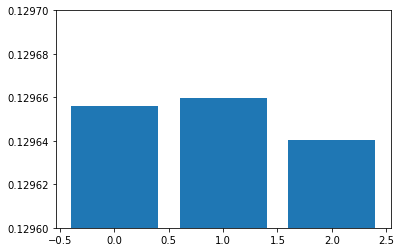

In [46]:
plt.bar(x = [0, 1, 2], height=[loss_function(y_test, cumulative_preds[-1,:]), 
                               loss_function(y_test, cumulative_preds[-2,:]),
                               loss_function(y_test, cumulative_preds[-1,:]-cumulative_preds[0,:])])
plt.ylim([0.1296, 0.1297])

In [47]:
loss_function(y_test, cumulative_preds[-1,:])

0.12965617221192005

In [48]:
loss_function(y_test, cumulative_preds[0,:])

0.684870547797505